In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

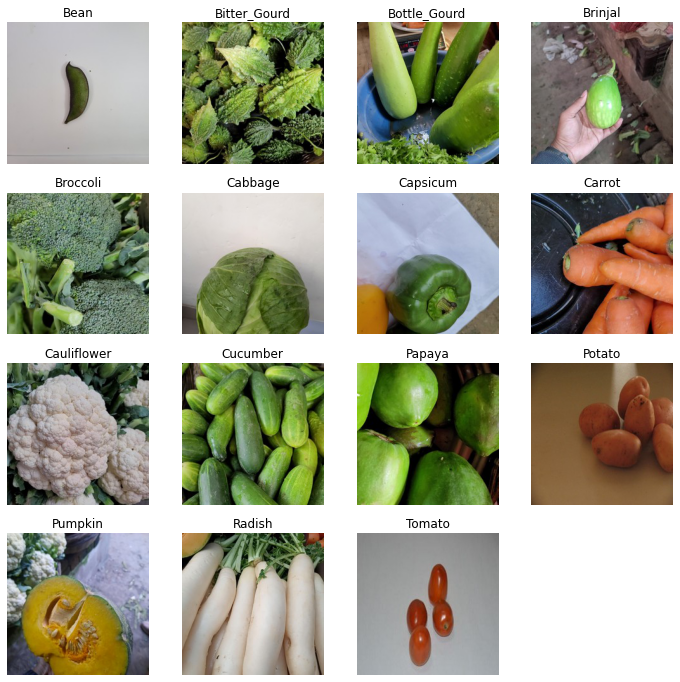

In [2]:
train_path =  r'C:\Users\Kushal\Desktop\Vegetable Images\train'
validation_path = r'C:\Users\Kushal\Desktop\Vegetable Images\validation'
test_path =  r'C:\Users\Kushal\Desktop\Vegetable Images\test'

image_categories = os.listdir(r'C:\Users\Kushal\Desktop\Vegetable Images\train')
def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
                # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()
      # Call the function
plot_images(image_categories)  

In [3]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')
# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [4]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [5]:
model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())
# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [6]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=10, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/10
468/468 [==============================] - 766s 2s/step - loss: 1.2688 - accuracy: 0.5794 - val_loss: 0.5844 - val_accuracy: 0.8162
Epoch 2/10
468/468 [==============================] - 455s 972ms/step - loss: 0.4963 - accuracy: 0.8458 - val_loss: 0.2908 - val_accuracy: 0.9113
Epoch 3/10
468/468 [==============================] - 453s 969ms/step - loss: 0.2804 - accuracy: 0.9094 - val_loss: 0.3133 - val_accuracy: 0.9052
Epoch 4/10
468/468 [==============================] - 459s 980ms/step - loss: 0.1920 - accuracy: 0.9395 - val_loss: 0.2009 - val_accuracy: 0.9405
Epoch 5/10
468/468 [==============================] - 455s 971ms/step - loss: 0.1425 - accuracy: 0.9554 - val_loss: 0.3190 - val_accuracy: 0.9180
Epoch 6/10
468/468 [==============================] - 449s 959ms/step - loss: 0.1215 - accuracy: 0.9624 - val_loss: 0.2240 - val_accuracy: 0.9378
Epoch 7/10
468/468 [==============================] - 447s 955ms/step - loss: 0.1029 - accuracy: 0.9665 - val_loss: 0.1864 - va

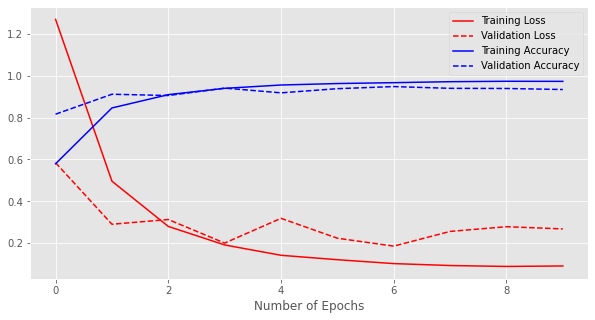

In [7]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()


In [8]:
model.evaluate(test_image_generator)

94/94 [==============================] - 94s 1s/step - loss: 0.2556 - accuracy: 0.9373


[0.25560468435287476, 0.937333345413208]

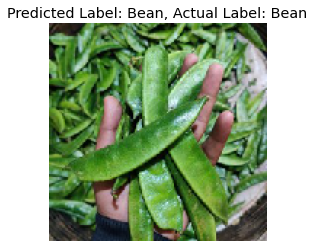

In [28]:
# Testing the 
test_image_path = r'C:\Users\Kushal\Desktop\Vegetable Images\test\Bean\0001.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Bean')

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image




In [32]:
model.save('Veg.h5')

In [29]:
%%writefile app.py
import streamlit as st
import tensorflow as tf

@st.cache(allow_output_mutation=True)
def load_model(x):
    classifier = tf.keras.models.load_model(x)
    return classifier
model = import_model('Veg.h5')
st.write("""
          # Vegetable Prediction
         """
        )
file = st.file_uploader("Please upload an vegetable image",type=['jpg'])
import cv2
from PIL import Image,ImageOps
import numpy as np
def import_and_predict(image_data,model):
    
    size = (150,150)
    image = ImageOps,fit(image_data,size,Image.ANTIALIAS)
    img = np.asarray(image)
    img_reshape = img[np.newaxis,...]
    prediction = model.predict(img_reshape)
    
    return prediction
if file is None:
    st.text("Please Upload an image file")
else:
    image = Image.open(file)
    st.image(image,use_column,width=True)
    predictions = import_and_predict(image,model)
    class_names = ['Bean','Bitter_Gourd','Bottle_Gourd','Brinjal','Broccoli','Cabbage','Capsicum','Carrot','Cauliflower','Cucumber','Papaya','Potato','Pumpkin','Radish','Tomato']
    string = "This image most likely is : "+ class_names[np.argmax(predictions)]
    st.success(string)

Writing app.py
